### Question 2: Gaussian, Spatial (Box), Temporal and Median Smoothing

In [11]:
import cv2
import numpy as np
import scipy
import glob
from scipy import ndimage
from skimage.registration import phase_cross_correlation
from plot_utils import *

image = cv2.imread('retina2/172.bmp', cv2.COLOR_BGR2GRAY)

image_paths = glob.glob('retina2/*.bmp')
input_images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in image_paths]

IndexError: list index out of range

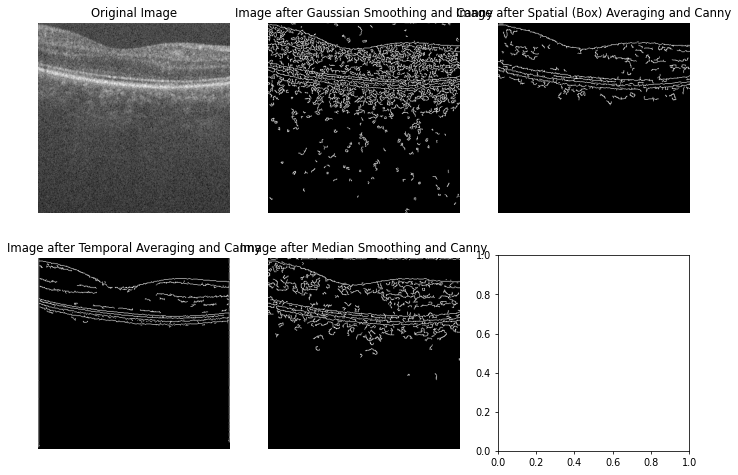

In [21]:
# Gaussian Smoothing
gaussian = cv2.GaussianBlur(image, (5, 5), 1)


# Spatial (Box) Averaging
spatial = cv2.blur(image, (5,5))


# Temporal Averaging
offset = 0
n = 30
first_image = input_images[offset]
corrected_images = []
for i in range(offset, offset+n):
    offset_image = input_images[i]
    shift, error, diffphase = phase_cross_correlation(first_image, offset_image, upsample_factor=100, overlap_ratio=0.9)
    corrected_image = scipy.ndimage.shift(offset_image, shift)
    corrected_images.append(corrected_image)
temporal = np.mean(corrected_images, axis=0).astype(np.uint8)


# Median Smoothing
median = cv2.medianBlur(image, 5)


# Canny Edge Detector
lower = 40
upper = 80
gaussian = cv2.Canny(gaussian, lower, upper, 3)
spatial = cv2.Canny(spatial, lower, upper, 3)
temporal = cv2.Canny(temporal, lower, upper, 3)
median = cv2.Canny(median, lower, upper, 3)

images = [[image, gaussian, spatial], [temporal, median]]
titles = [['Original Image', 'Image after Gaussian Smoothing and Canny', 
           'Image after Spatial (Box) Averaging and Canny'],
           ['Image after Temporal Averaging and Canny',
           'Image after Median Smoothing and Canny']]

plot_images(images, titles, dpi=70)

In [ ]:
image = cv2.imread('viz_outputs/retina2_ksize1_tavg30_232-261.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = [
    [cv2.Canny(image, 50, 200), cv2.Canny(image, 100, 200), cv2.Canny(image, 150, 200)],
    [cv2.Canny(image, 50, 300), cv2.Canny(image, 100, 300), cv2.Canny(image, 150, 300)]
]
titles = [['Edge #1', 'Edge #2', 'Edge #3'], ['Edge #4', 'Edge #5', 'Edge #6']]

plot_overlay_edges(edges, titles, image, dpi=50)